In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x

(60000, 784)
(10000, 784)


In [3]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [4]:
!conda install keras

Solving environment: done

# All requested packages already installed.



In [4]:
original_dim = 28*28
hidden_dim_1 = 500
hidden_dim_2 = 500
hidden_dim_3 = 2000
encoded_dim = 10
dimentions = [original_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, encoded_dim]
n_layers = 4

In [6]:
def get_layer_autoencoder(input_dim, output_dim):
  """
  This function generates autoencoder layer 
  with specified input and output dimentions
  return:3 models:  autoencoder, encoder and decoder
  """
  input_ = Input(shape=(input_dim,))
  encoder_dropout = Dropout(0.2)(input_)
  if output_dim == encoded_dim:
    encoder_dense = Dense(output_dim, activation='linear')(encoder_dropout)
  else:
    encoder_dense = Dense(output_dim, activation='relu')(encoder_dropout)
  encoded_input = Input(shape=(output_dim,))

  decoder_dropout = Dropout(0.2)(encoder_dense)
  if output_dim == original_dim:
    decoder_dense = Dense(input_dim, activation='linear')(decoder_dropout)
  else:
    decoder_dense = Dense(input_dim, activation='relu')(decoder_dropout)

  autoencoder = Model(input_, decoder_dense)
 
  decoder_dense_layer = autoencoder.layers[-1]
  decoder_dropout_layer = autoencoder.layers[-2]


  #create encoder and decoder
  encoder = Model(input_, encoder_dense)
  decoder = Model(encoded_input, decoder_dense_layer(decoder_dropout_layer
                                                     (encoded_input)))
  autoencoder.compile(loss='mean_squared_error', optimizer='adam')
  return autoencoder, encoder, decoder

In [7]:
def train_autoencoder_layers_separately():
  autoencoders = []
  encoders = []
  decoders = []
  inputs_test = [x_test]
  inputs_train = [x_train]
  input_i_test = x_test
  input_i_train = x_train
  for i in range(n_layers):
    autoencoder, encoder, decoder = get_layer_autoencoder(dimentions[i], dimentions[i+1])
    print(f'<========================================{i + 1} autoencoder layer generated========================================>')

    autoencoder.fit(inputs_train[i], inputs_train[i],
                     epochs=50,
                     batch_size=256,
                     validation_data=(inputs_test[i], inputs_test[i]))
    print(f'<========================================{i + 1} autoencoder layer trained========================================>')
    autoencoders.append(autoencoder)
    encoders.append(encoder)
    decoders.append(decoder)
    inputs_train.append(encoder.predict(inputs_train[i]))
    inputs_test.append(encoder.predict(inputs_test[i]))
  return autoencoders, encoders, decoders

In [8]:
autoencoders, encoders, decoders = train_autoencoder_layers_separately()

<========================================1 autoencoder layer generated========================================>
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.0274 - val_loss: 0.0105
Epoch 2/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0150 - val_loss: 0.0087
Epoch 3/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.0132 - val_loss: 0.0076
Epoch 4/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.0120 - val_loss: 0.0069
Epoch 5/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0111 - val_loss: 0.0064
Epoch 6/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.0105 - val_loss: 0.0061
Epoch 7/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.0100 - val_loss: 0.0058
Epoch 8/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0097 - val_los

Epoch 24/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0061 - val_loss: 0.0026
Epoch 25/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0061 - val_loss: 0.0026
Epoch 26/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0061 - val_loss: 0.0026
Epoch 27/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0061 - val_loss: 0.0025
Epoch 28/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0060 - val_loss: 0.0026
Epoch 29/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0060 - val_loss: 0.0025
Epoch 30/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0060 - val_loss: 0.0025
Epoch 31/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0060 - val_loss: 0.0025
Epoch 32/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0060 - val_loss: 0.0025
Epoch 33/50
60000/60000 [=====================

Epoch 48/50
60000/60000 [==============================] - 13s 217us/step - loss: 0.0030 - val_loss: 0.0017
Epoch 49/50
60000/60000 [==============================] - 13s 213us/step - loss: 0.0030 - val_loss: 0.0017
Epoch 50/50
60000/60000 [==============================] - 13s 219us/step - loss: 0.0030 - val_loss: 0.0017
<========================================3 autoencoder layer trained========================================>
<========================================4 autoencoder layer generated========================================>
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.0053 - val_loss: 0.0042
Epoch 2/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0047 -

In [32]:
autoencoders[3].layers[4]

In [11]:
# fine tune full autoencoder

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.models import Sequential
input_ = Input(shape=(original_dim,))
encode1 = autoencoders[0].layers[1](input_)
# print(encode1.get_input_shape_at(0))
encode1 = autoencoders[0].layers[2](encode1)
print(encode1[0].shape)
encode2 = autoencoders[1].layers[1](encode1)
encode2 = autoencoders[1].layers[2](encode2)
print(encode2[0].shape)
encode3 = autoencoders[2].layers[1](encode2)
encode3 = autoencoders[2].layers[2](encode3)
print(encode3[0].shape)
encode4 = autoencoders[3].layers[1](encode3)
encode4 = autoencoders[3].layers[2](encode4)
print(encode4[0].shape)

decode4 = autoencoders[3].layers[3](encode4)
decode4 = autoencoders[3].layers[4](decode4)
decode3 = autoencoders[2].layers[3](decode4)
decode3 = autoencoders[2].layers[4](decode3)
decode2 = autoencoders[1].layers[3](decode3)
decode2 = autoencoders[1].layers[4](decode2)
decode1 = autoencoders[0].layers[3](decode2)
decode1 = autoencoders[0].layers[4](decode1)


sae_autoencoder = Model(inputs=input_, outputs=decode1)

# encode_layers = []
# decode_layers = []
# for i in range(n_layers):
#   encode_layers.extend([autoencoders[i].layers[0], autoencoders[i].layers[1]])
#   decode_layers.insert(0, autoencoders[i].layers[-1])  # decode layers are in reverse order
#   decode_layers.insert(0, autoencoders[i].layers[-2])

# layers = encode_layers + decode_layers
# sae_autoencoder = Model(layers)
sae_autoencoder.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# print(sae_autoencoder.summary())


(500,)
(500,)
(2000,)
(10,)


In [13]:
!pip install goo

ModuleNotFoundError: No module named 'google.colab'

In [12]:


sae_autoencoder.save('sae_autoencoder.h5')
from google.colab import files
files.download( "sae_autoencoder.h5" ) 


ModuleNotFoundError: No module named 'google.colab'

In [11]:
print(sae_autoencoder.summary)
history = sae_autoencoder.fit(x_train, x_train,
                     epochs=10,
                     batch_size=256,
                     validation_data=(x_test, x_test))

<bound method Network.summary of <keras.engine.training.Model object at 0xb9a047c18>>
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0381 - acc: 0.0101 - val_loss: 0.0253 - val_acc: 0.0140
Epoch 2/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.0341 - acc: 0.0113 - val_loss: 0.0242 - val_acc: 0.0133
Epoch 3/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0326 - acc: 0.0099 - val_loss: 0.0233 - val_acc: 0.0089
Epoch 4/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0318 - acc: 0.0107 - val_loss: 0.0227 - val_acc: 0.0121
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0313 - acc: 0.0106 - val_loss: 0.0225 - val_acc: 0.0150
Epoch 6/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0309 - acc: 0.0102 - val_loss: 0.0225 - val_acc: 0.0110
Epoch 7/10
60000/60000 [======

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
sae_autoencoder.summary()

NameError: name 'sae_autoencoder' is not defined

In [0]:
predicted = sae_autoencoder.predict(x_test)

In [0]:
for i in predicted:
  i.reshape(28,28)

In [54]:
predicted[0].shape

(784,)

In [57]:
!pwd

/content


In [72]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [75]:
!ls

drive  gdrive  sae_autoencoder.h5  sample_data


In [0]:
from google.colab import files
files.download( "sae_autoencoder.h5" ) 

In [0]:
sae_autoencoder.save('sae_autoencoder.h5')

(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)


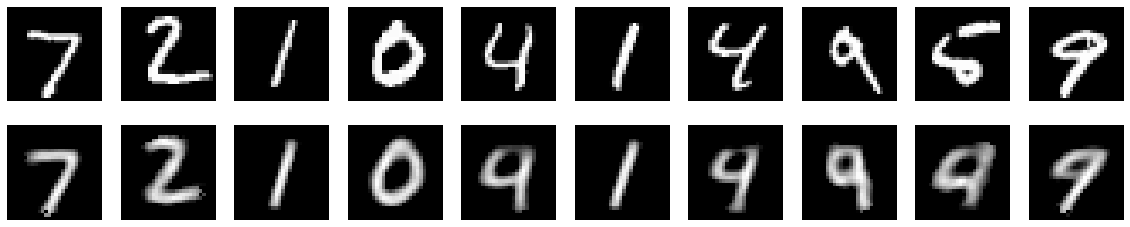

In [56]:
import matplotlib.pyplot as plt
# sae_autoencoder.predict(x_test[i])
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    print(x_test[i].shape)
    plt.imshow(predicted[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
from keras.models import load_model
sae_autoencoder = load_model('sae_autoencoder.h5')

In [6]:
sae_autoencoder.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])

In [3]:
import matplotlib.pyplot as plt

In [7]:
for i in range(5):
    history = sae_autoencoder.fit(x_train, x_train,
                     epochs=50,
                     batch_size=256,
                     validation_data=(x_test, x_test))
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
    sae_autoencoder.save(f'sae_autoencoder_{i}.h5')
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 506us/step - loss: 0.0382 - acc: 0.0101 - val_loss: 0.0257 - val_acc: 0.0102
Epoch 2/50
60000/60000 [==============================] - 32s 541us/step - loss: 0.0339 - acc: 0.0094 - val_loss: 0.0241 - val_acc: 0.0122
Epoch 3/50
60000/60000 [==============================] - 30s 506us/step - loss: 0.0327 - acc: 0.0094 - val_loss: 0.0234 - val_acc: 0.0107
Epoch 4/50
60000/60000 [==============================] - 28s 471us/step - loss: 0.0319 - acc: 0.0103 - val_loss: 0.0230 - val_acc: 0.0125
Epoch 5/50
60000/60000 [==============================] - 28s 474us/step - loss: 0.0313 - acc: 0.0100 - val_loss: 0.0228 - val_acc: 0.0099
Epoch 6/50
60000/60000 [==============================] - 29s 482us/step - loss: 0.0308 - acc: 0.0097 - val_loss: 0.0222 - val_acc: 0.0092
Epoch 7/50
60000/60000 [==============================] - 30s 508us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.

NameError: name 'plt' is not defined

In [8]:
metrics = sae_autoencoder.evaluate(x_train, x_train)


60000/60000 [==============================] - 7s 113us/step


In [10]:
for i in range(len(sae_autoencoder.metrics_names)):
    print(str(sae_autoencoder.metrics_names[i]) + ": " + str(metrics[i]))

loss: 0.023036169837911923
acc: 0.012033333333333333


In [1]:
predicted = sae_autoencoder.predict(x_test)
import matplotlib.pyplot as plt
# sae_autoencoder.predict(x_test[i])
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    print(x_test[i].shape)
    plt.imshow(predicted[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: name 'sae_autoencoder' is not defined